## Library importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime
import warnings
warnings.filterwarnings('ignore')

C:\Users\marcm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data importation

- Data from **European Centre for Disease Prevention and Control** (https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data).

- Updated daily.


In [2]:
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

## Preliminary data exploration

In [3]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,04/04/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  9310 non-null   object 
 1   day                      9310 non-null   int64  
 2   month                    9310 non-null   int64  
 3   year                     9310 non-null   int64  
 4   cases                    9310 non-null   int64  
 5   deaths                   9310 non-null   int64  
 6   countriesAndTerritories  9310 non-null   object 
 7   geoId                    9286 non-null   object 
 8   countryterritoryCode     9125 non-null   object 
 9   popData2018              9172 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 727.5+ KB


### Number of countries

In [5]:
len(df['countriesAndTerritories'].unique())

204

## Column transformations

### Date format to datetime

In [6]:
df['dateRep'] =  pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

### Checking last update

In [7]:
df.dateRep.max()

Timestamp('2020-04-07 00:00:00')

### New column: cases per 100.000 inhabitants (cases_per_100K)

In [8]:
# New columns: cases per 100K people

df['cases_per_100K'] = (100000*df['cases']) / df['popData2018']

### Selecting dates from Jan 15th

In [9]:
df = df.loc[df['dateRep']>'2020-01-15']

## Plots

### World cummulative cases and deaths

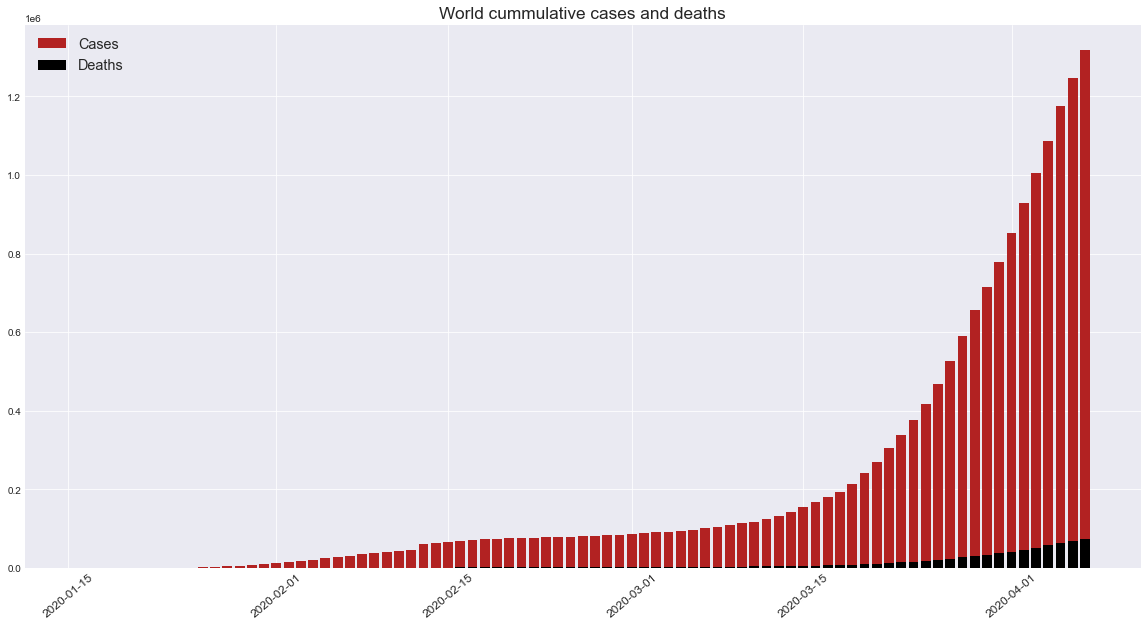

In [10]:
dfdates = df.groupby('dateRep', as_index=False).agg('sum')
dfdates = dfdates.sort_values('dateRep')
dfdates['cum_cases'] = np.cumsum(dfdates['cases'])
dfdates['cum_deaths'] = np.cumsum(dfdates['deaths'])

plt.style.use('seaborn-darkgrid')
fig = plt.subplots(figsize=(20,10))
ax1 = plt.bar('dateRep', 'cum_cases', data=dfdates, color='firebrick', label='Cases', linewidth=5)
ax2 = plt.bar('dateRep', 'cum_deaths', data=dfdates, color='black', label='Deaths', linewidth=5)
plt.title('World cummulative cases and deaths', fontsize='xx-large')
plt.xticks(fontsize='large', rotation=40 )
plt.legend(loc='upper left', fontsize='x-large')


plt.show()

### World daily new cases and deaths

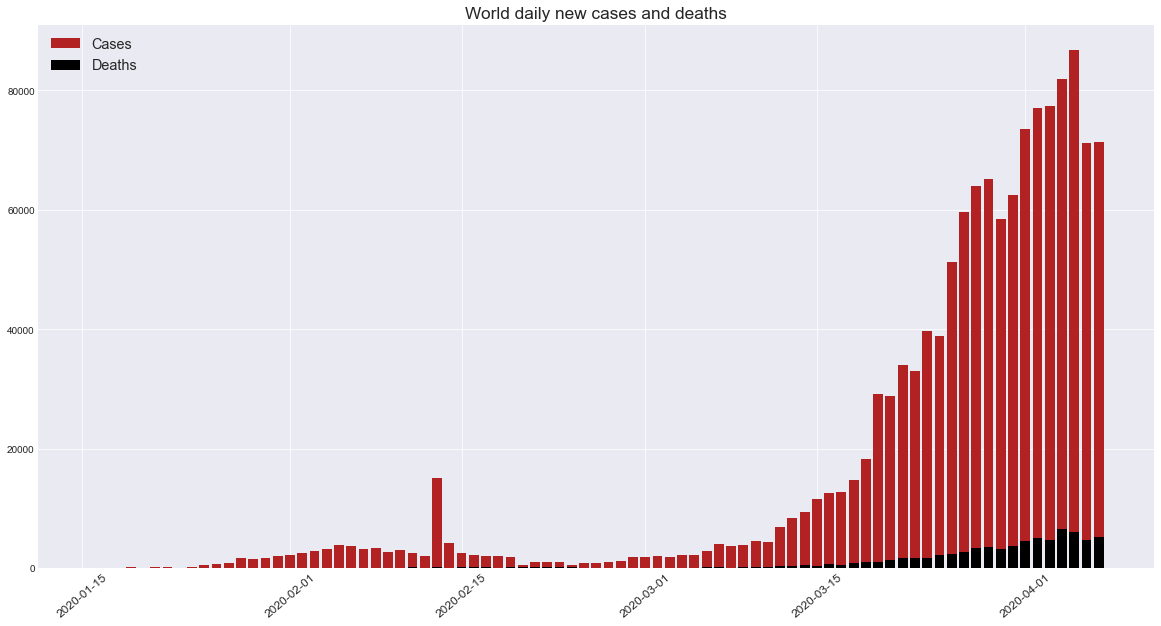

In [11]:
dfdates = df.groupby('dateRep', as_index=False).agg('sum')
dfdates = dfdates.sort_values('dateRep')

plt.style.use('seaborn-darkgrid')
fig = plt.subplots(figsize=(20,10))
ax1 = plt.bar('dateRep', 'cases', data=dfdates, color='firebrick', label='Cases', linewidth=5)
ax2 = plt.bar('dateRep', 'deaths', data=dfdates, color='black', label='Deaths', linewidth=5)
plt.title('World daily new cases and deaths', fontsize='xx-large')
plt.xticks(fontsize='large', rotation=40 )
plt.legend(loc='upper left', fontsize='x-large')


plt.show()

### Cummulative cases and deaths per country and date

In [12]:
uniques = [c for c in df['countriesAndTerritories'].unique()]

@interact
def choose_country(country = uniques):
    dfcountry = df.loc[df['countriesAndTerritories']==country]
    dfcountry = dfcountry.sort_values('dateRep')
    dfcountry['cum_cases'] = np.cumsum(dfcountry['cases'])
    dfcountry['cum_deaths'] = np.cumsum(dfcountry['deaths'])

    plt.style.use('seaborn-darkgrid')
    fig = plt.subplots(figsize=(20,10))
    ax1 = plt.plot('dateRep', 'cum_cases', data=dfcountry, color='firebrick', label='Cases', linewidth=4)
    ax2 = plt.plot('dateRep', 'cum_deaths', data=dfcountry, color='black', label='Deaths', linewidth=4)
    plt.title(str.upper(f'{country}'), fontsize='xx-large')
    plt.xticks(fontsize='large', rotation=40 )
    plt.legend(loc='upper left', fontsize='x-large')
    
    
    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Andorra', 'Algeria',…